# Puma560

In [1]:
# We will do the imports required for this notebook here

# numpy provides import array and linear algebra utilities
import numpy as np

# the robotics toolbox provides robotics specific functionality
import roboticstoolbox as rtb

# spatial math provides objects for representing transformations
import spatialmath as sm

# the matplotlib library provides plotting functionality
import matplotlib.pyplot as plt

In [2]:
models_list = rtb.models.list()

┌──────────────┬───────────────────────┬─────────────────────┬──────┬─────┬──────┬────────────────────────────────────────────────────────────┬──────────┬──────────┬──────────────────────────┐
│    class     │         name          │    manufacturer     │ type │ DoF │ dims │                                                  structure │ dynamics │ geometry │         keywords         │
├──────────────┼───────────────────────┼─────────────────────┼──────┼─────┼──────┼────────────────────────────────────────────────────────────┼──────────┼──────────┼──────────────────────────┤
│ Panda        │ Panda                 │ Franka Emika        │ DH   │ 7   │ 3d   │ RRRRRRR                                                    │ Y        │ Y        │                          │
│ Puma560      │ Puma 560              │ Unimation           │ DH   │ 6   │ 3d   │ RRRRRR                                                     │ Y        │ Y        │ dynamics, symbolic, mesh │
│ Stanford     │ Stanford arm      

In [3]:
puma560 = rtb.models.Puma560()

puma560

ERobot: Puma560 (by Unimation), 6 joints (RRRRRR), geometry, collision
┌──────┬────────┬───────┬────────┬───────────────────────────────────────────────────┐
│ link │  link  │ joint │ parent │                ETS: parent to link                │
├──────┼────────┼───────┼────────┼───────────────────────────────────────────────────┤
│    0 │ link1  │       │ BASE   │ SE3()                                             │
│    1 │ link2  │     0 │ link1  │ SE3(0, 0, 0.5486; 90°, -0°, 0°) ⊕ Ry(q0)          │
│    2 │ link3  │     1 │ link2  │ SE3(0, 0.07493, 0.1422) ⊕ Rz(q1)                  │
│    3 │ link4  │     2 │ link3  │ SE3(0.4318, 0, 0.0254; 0°, -0°, 90°) ⊕ Rz(q2)     │
│    4 │ link5  │     3 │ link4  │ SE3(0.3518, 0, -0.0381; -90°, -0°, -90°) ⊕ Rz(q3) │
│    5 │ link6  │     4 │ link5  │ SE3(0, 0, 0.0803; 90°, -0°, 0°) ⊕ Rz(q4)          │
│    6 │ @link7 │     5 │ link6  │ SE3(0, 0.05334, 0; -90°, -0°, 0°) ⊕ Rz(q5)        │
└──────┴────────┴───────┴────────┴─────────────────────────

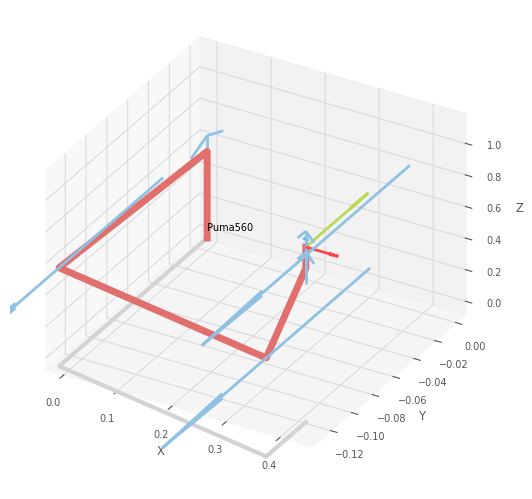

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Puma560')

<Figure size 640x480 with 0 Axes>

In [4]:
puma560.plot(puma560.qz, backend='pyplot', movie='Puma560.gif')

## Forward Kinematics

In [5]:
base_point = puma560.fkine(puma560.qr).t

fk_puma560 = puma560.fkine(puma560.ld) # Forward kinematics of the Puma 560

print(f"The base point of the end-effector at ready position: \n{base_point}")

# The ETS class has the .fkine method which can calculate the forward kinematics
# The .fkine methods returns an SE3 object
print(f"The fkine method for ld: \n{fk_puma560}")

The base point of the end-effector at ready position: 
[ 6.31426671e-10 -1.29539998e-01  1.54079900e+00]
The fkine method for ld: 
   3.232e-05 -6.598e-05  1         0.6522    
  -1.829e-05  1         6.598e-05 -0.1747    
  -1        -1.83e-05  3.232e-05  0.5944    
   0         0         0         1         



## Inverse Kinematics

In [6]:
# The ETS class has the .ikine_LM method which can calculate the inverse kinematics

ik_puma560 = []
n_solutions = 3

for i in range(n_solutions):
    ik_puma560.append(puma560.ikine_LM(fk_puma560)) # inverse kinematics

    print(f"\n\nSolution {i+1}:")
    print(ik_puma560[i])
    print(f"The ikine method (y): \n{ik_puma560[i].q}")



Solution 1:
IKSolution: q=[-0.0746, -0.8335, -5.534e-06, 0.1108, -0.7403, -0.08198], success=True, iterations=40, searches=4, residual=4.34e-07
The ikine method (y): 
[-7.45993426e-02 -8.33493756e-01 -5.53360158e-06  1.10816773e-01
 -7.40327594e-01 -8.19791029e-02]


Solution 2:
IKSolution: q=[-0.0746, -0.8335, -7.251e-06, 0.1108, -0.7403, -0.08198], success=True, iterations=8, searches=1, residual=4.97e-08
The ikine method (y): 
[-7.46000325e-02 -8.33492684e-01 -7.25070637e-06  1.10817274e-01
 -7.40326982e-01 -8.19789543e-02]


Solution 3:
IKSolution: q=[-0.0746, -0.8335, -6.527e-06, 0.1108, -0.7403, -0.08198], success=True, iterations=37, searches=2, residual=2.39e-07
The ikine method (y): 
[-7.45997262e-02 -8.33492931e-01 -6.52650630e-06  1.10816343e-01
 -7.40327206e-01 -8.19782589e-02]


## Plotting Foward Kinematics

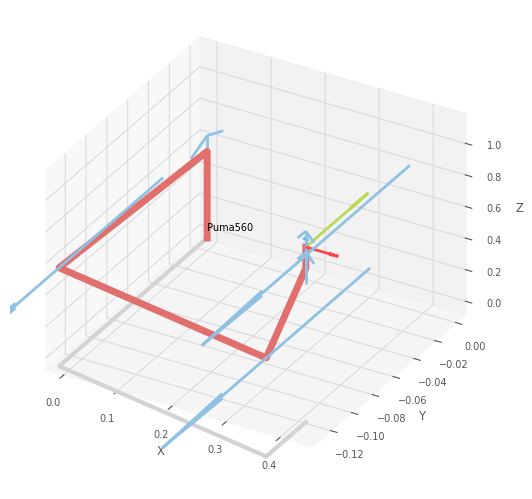

PyPlot3D backend, t = 2.499999999999999, scene:
  robot: Text(0.0, 0.0, 'Puma560')

<Figure size 640x480 with 0 Axes>

In [7]:
# Animate the trajectory of manipulator, puma560, from qz to qr
qt = rtb.tools.trajectory.jtraj(puma560.qz, puma560.qr, 50)

# Plot the trajectory of the puma560 manipulator
puma560.plot(qt.q, backend="pyplot", movie='Media/Puma560/Puma560 FK.gif')


## Finding Workspace of the Manipulator

credits to:

- [A Tutorial on Manipulator Differential Kinematics, Notebook 5 Manipulator Performance Measures](https://github.com/jhavl/dkt)
- [Workspace Analysis for Manipulators](https://www.mathworks.com/help/robotics/ug/workspace-analysis-for-manipulators.html)

for the inspiration!

### Generating a lot of random end-effector positions from random joint angles

In [8]:
# Joint angle limits of the manipulator
qlim = puma560.qlim

print(qlim)

[[-3.14159265 -1.57079633 -1.57079633 -1.57079633 -1.57079633 -1.57079633]
 [ 3.14159265  1.57079633  1.57079633  1.57079633  1.57079633  1.57079633]]


In [9]:
import random

list_of_points = [] # List of end effector positions
list_q_point = [] # List of joint angles
n_points = 200000

for i in range(n_points):
    # Define the joint limits
    q_max = [random.uniform(qlim[0][0], qlim[1][0]), random.uniform(qlim[0][1], qlim[1][1]), random.uniform(qlim[0][2], qlim[1][2]), random.uniform(qlim[0][3], qlim[1][3]), random.uniform(qlim[0][4], qlim[1][4]), random.uniform(qlim[0][5], qlim[1][5])]

    q_point = np.array(q_max)
    fk_puma560 = puma560.fkine(q_point) # The forward kinematics of the Panda at the ready position

    list_q_point.append(q_point) # The joint angles
    list_of_points.append(fk_puma560.t) # The position of the end effector

list_of_points = np.array(list_of_points)
list_q_point = np.array(list_q_point)
print(list_of_points)

[[ 0.01997288  0.20102692  0.63257426]
 [-0.3285958   0.32384438  0.8978201 ]
 [ 0.03085324 -0.19325296  0.68767056]
 ...
 [ 0.65903768 -0.44786644  0.26357878]
 [ 0.08911229  0.15305532  1.50575903]
 [ 0.25104575  0.11453054  1.18741569]]


### Calculating Yoshikawa manipulability index for rotation axes

In [10]:
def manipulability(robot, q, axes):
    """
    Calculates the manipulability of the robot at joint configuration q

    :robot: A Robot object to find the manipulability of
    :q: The joint coordinates of the robot (ndarray)
    :axes: A boolean list which correspond with the Cartesian axes to
        find the manipulability of (6 boolean values in a list)
    """
    # calculate the Jacobian
    J = robot.jacobe(q)

    # only keep the selected axes of J
    J = J[axes, :]

    # calculate the manipulability
    m = np.sqrt(np.linalg.det(J @ J.T))

    return m

In [11]:
# Only the rotation axes
rot_axes = [False, False, False, True, True, True]

list_rot_manipulability = []

for i in range(n_points):
    rot_manipulability = manipulability(puma560, list_q_point[i], rot_axes)
    list_rot_manipulability.append(rot_manipulability)

list_rot_manipulability = np.array(list_rot_manipulability)
# print(list_rot_manipulability)

print(puma560)

ERobot: Puma560 (by Unimation), 6 joints (RRRRRR), geometry, collision
┌──────┬────────┬───────┬────────┬───────────────────────────────────────────────────┐
│ link │  link  │ joint │ parent │                ETS: parent to link                │
├──────┼────────┼───────┼────────┼───────────────────────────────────────────────────┤
│    0 │ link1  │       │ BASE   │ SE3()                                             │
│    1 │ link2  │     0 │ link1  │ SE3(0, 0, 0.5486; 90°, -0°, 0°) ⊕ Ry(q0)          │
│    2 │ link3  │     1 │ link2  │ SE3(0, 0.07493, 0.1422) ⊕ Rz(q1)                  │
│    3 │ link4  │     2 │ link3  │ SE3(0.4318, 0, 0.0254; 0°, -0°, 90°) ⊕ Rz(q2)     │
│    4 │ link5  │     3 │ link4  │ SE3(0.3518, 0, -0.0381; -90°, -0°, -90°) ⊕ Rz(q3) │
│    5 │ link6  │     4 │ link5  │ SE3(0, 0, 0.0803; 90°, -0°, 0°) ⊕ Rz(q4)          │
│    6 │ @link7 │     5 │ link6  │ SE3(0, 0.05334, 0; -90°, -0°, 0°) ⊕ Rz(q5)        │
└──────┴────────┴───────┴────────┴─────────────────────────

### Plot the points on a 3D plot, with the color representing the manipulability index

C:\Users\Tal I\AppData\Local\Temp\ipykernel_4484\1192159705.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(scatter, ax=ax)


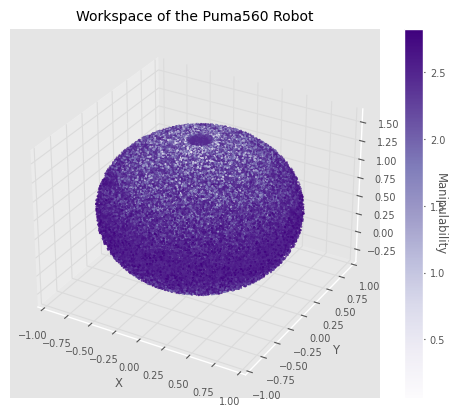

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = list_of_points[:,0]
y = list_of_points[:,1]
z = list_of_points[:,2]
c = list_rot_manipulability
cmap = plt.cm.Purples
s = 1

scatterx = ax.scatter([base_point[0]], [base_point[1]], [base_point[2]], c='red')
scatter = ax.scatter(x, y, z, c=c, cmap=cmap, s=s)

# set zorders here
scatterx.set_zorder(2)
scatter.set_zorder(1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Manipulability', rotation=270)

plt.title('Workspace of the Puma560 Robot')

plt.show()

## Plotting Inverse Kinematics solutions

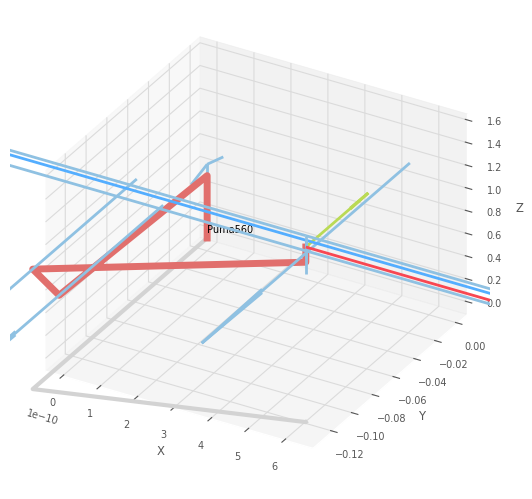

<Figure size 640x480 with 0 Axes>

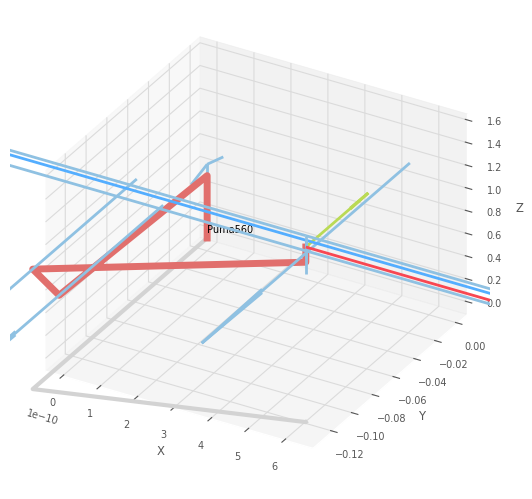

<Figure size 640x480 with 0 Axes>

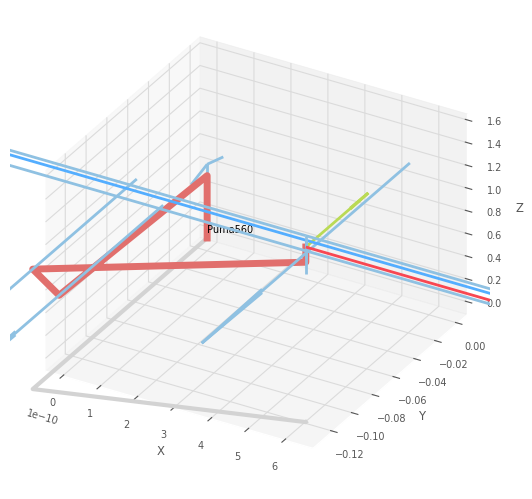

<Figure size 640x480 with 0 Axes>

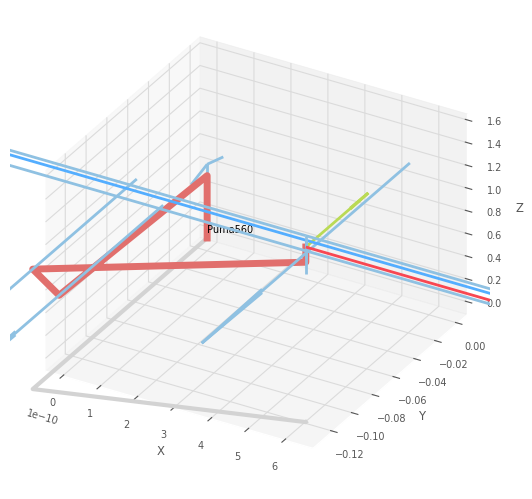

<Figure size 640x480 with 0 Axes>

In [13]:
# Animate the trajectory of manipulator, panda, from qr to ik.q
qt = rtb.tools.trajectory.jtraj(puma560.qr, puma560.ld, 50)
puma560.plot(qt.q, backend="pyplot", movie=f'Media/Puma560/Puma560 FK LD.gif')

for i in range(n_solutions):
    qt = rtb.tools.trajectory.jtraj(puma560.qr, ik_puma560[i].q, 50)

    # Plot the trajectory of the panda manipulator
    puma560.plot(qt.q, backend="pyplot", movie=f'Media/Puma560/Puma560 IK{i+1}.gif')